# Exercise Sheet 5

Leon Oleschko and Aurel Müller-Schoenau  
20.12.2022

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math

## Aufgabe 1

We were given a bunch of sample data. The Tasks:

- Write a program that calculates the fourier transform

In order to demonstrate the impact of noise, we denoise the spectrum by cutting off weak frequency components and plot the denoised spectrum as well as reconstructed data. 


Maximum amplitude at k=28.302608216190446


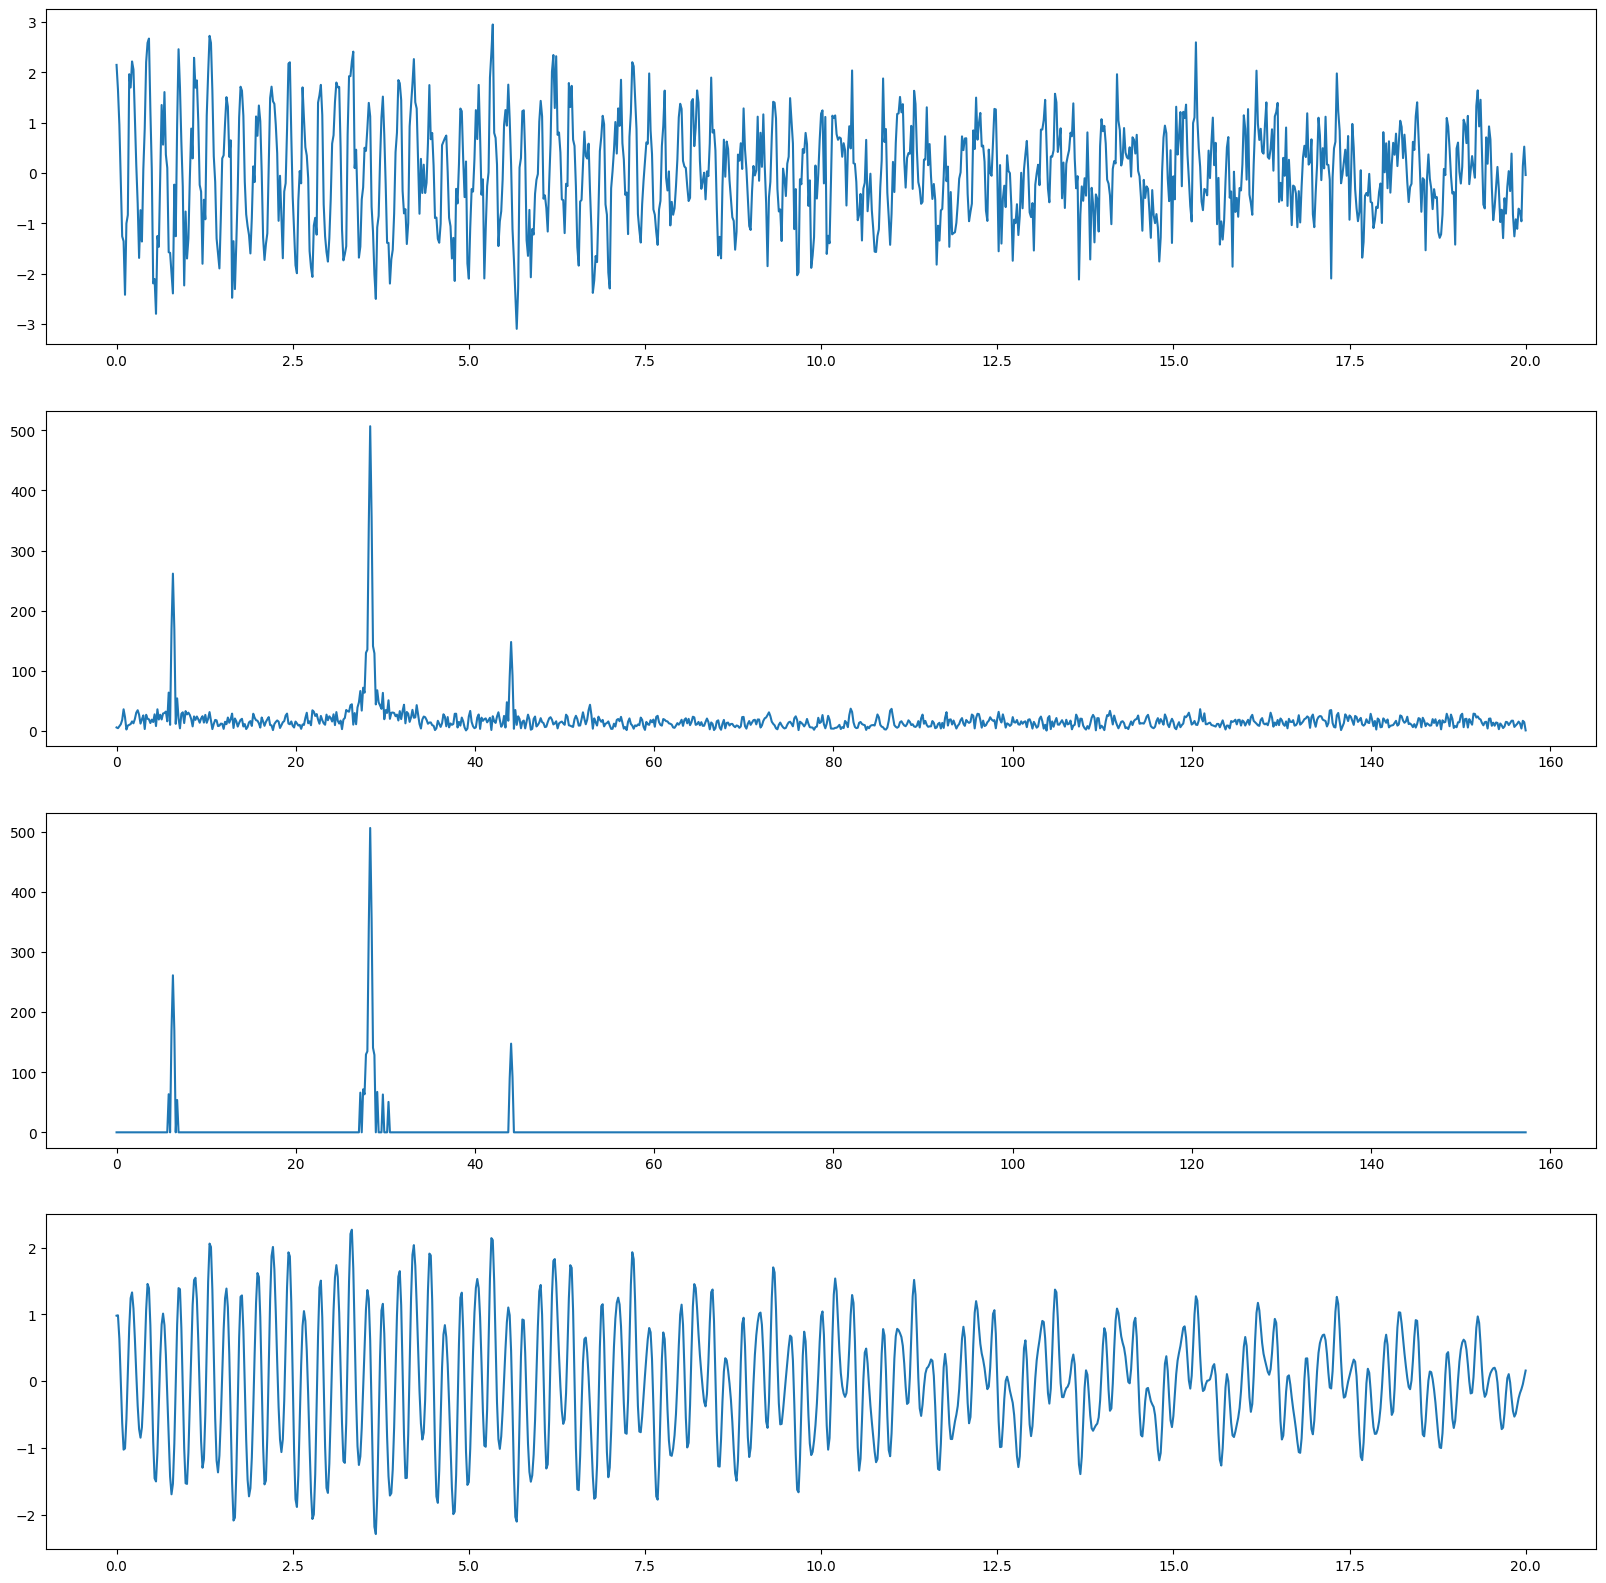

In [180]:
data_txt = np.loadtxt("sample-data.dat")


# plot sample data
fig, ax = plt.subplots(4,1,figsize=(20,20))
data = np.compress([False, True], data_txt, axis=1)
x_range = np.linspace(data_txt[0][0], data_txt[-1][0], data.shape[0])
ax[0].plot(x_range,data)


def fourier_transform(data_x_range,data_points,inverse=0): # inverse determines whether ft or ift should be performed
    N = data_x_range.size
    L = data_x_range[-1] - data_x_range[0] # length of interval
    min_k = np.pi / L # minimum k vector
    result = []
    inv_factor = 2*inverse-1 # -1 for ft, 1 for inverse ft. Will appear in exponent.
    inv_div = inverse*N + 1 - inverse # division factor: 1 for ft, N for inverse ft
    data_x_range = data_x_range.reshape((N,1))

    for i in range(0,N):
        k = min_k * i
        value = 0

        value = np.sum(np.exp(inv_factor*1j * k * data_x_range) * data_points)

        # the commented out part does the same as the line above, but much slower
        # sum over all x values to transform into k space
        #for j in range(0,N):
        #    value += np.exp(inv_factor*1j * k * data_x_range[j]) * data_points[j]

        # append to results list
        result.append(value)
    result = np.array(result).reshape(N,1) / inv_div # divide by factor defined above. (reshape to get right format)
    return np.linspace(0, min_k * N, N).reshape(N,1), result

# perform a fourier transform of sample data using method defined above
k_range, data_ft = fourier_transform(x_range, data, inverse=0)

# find frequency peak
a_peak = np.max(data_ft)
k_peak = k_range[np.max(np.array(range(0,data.size)).reshape(data.size,1) * (1 - (data_ft > a_peak) - (data_ft < a_peak)))][0]
print("Maximum amplitude at k={}".format(k_peak))

# plot transformed data
ax[1].plot(k_range,np.abs(data_ft))

# cut off frequencies with amplitude lower 50
threshold = 50
data_ft_filtered = (np.abs(data_ft) > threshold)*data_ft

# plot denoised spectrum as well as its ift (= denoised data)
x_range_new, data_reconstructed = fourier_transform(k_range, data_ft_filtered, inverse=1)
ax[2].plot(k_range,np.abs(data_ft_filtered))
ax[3].plot(x_range_new,np.real(data_reconstructed)) # real because data might contain imaginary part from numerical errors
plt.show()


- Apply some filters to the fourier spectrum: high pass, low pass, band pass


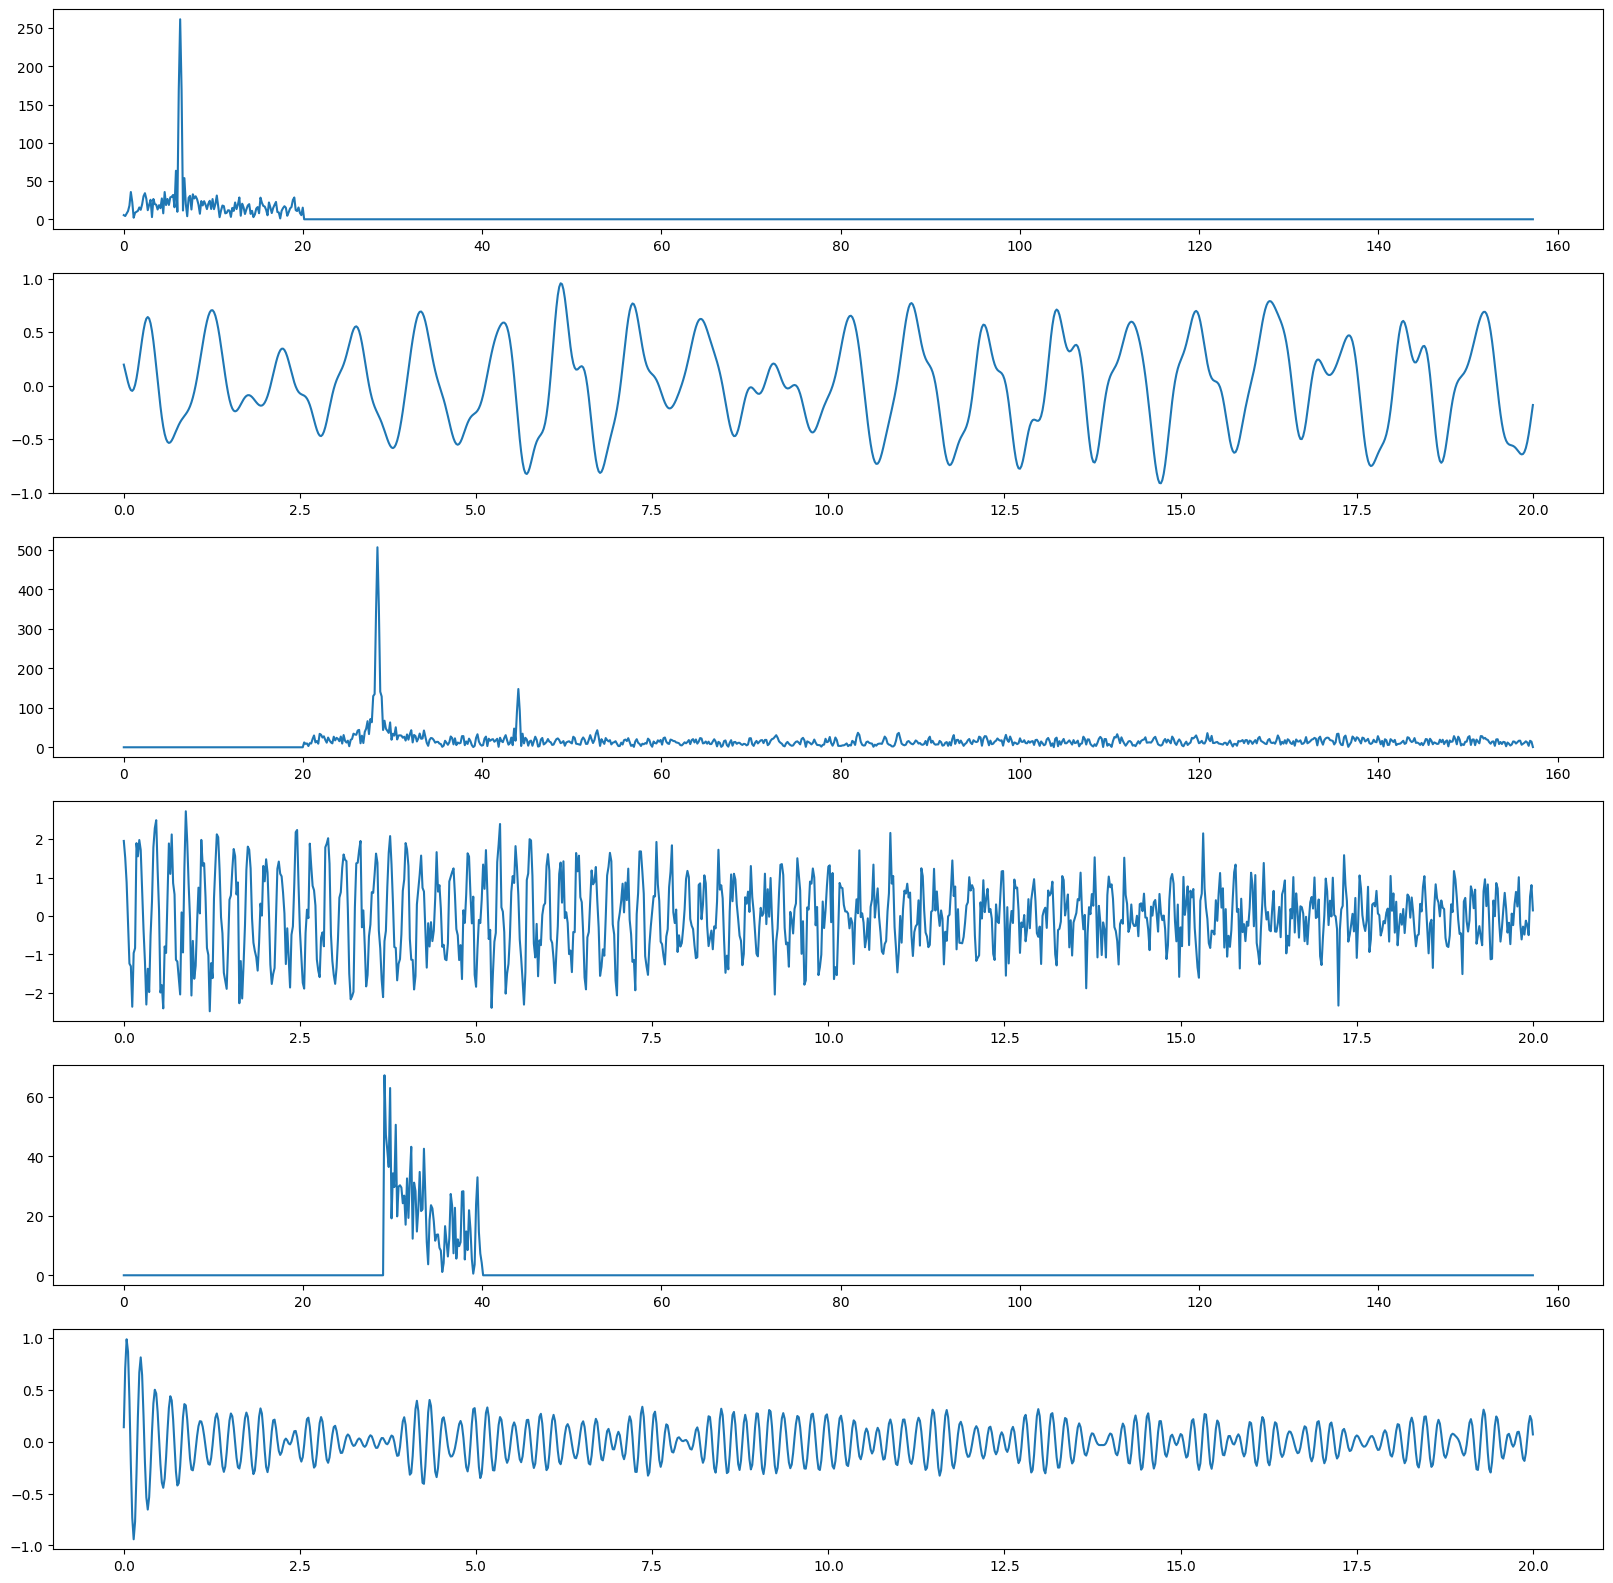

In [163]:
# new graph
fig, ax = plt.subplots(6,1,figsize=(20,20))

# low pass
threshold = 20
spectrum_filtered = (k_range < threshold) * data_ft #spectrum

# transform back
x_range_new, signal_new = fourier_transform(k_range, spectrum_filtered, inverse=1)

# plot low passed spectrum and reconstructed signal
ax[0].plot(k_range,np.abs(spectrum_filtered))
ax[1].plot(x_range_new, np.real(signal_new))


# high pass
threshold = 20
spectrum_filtered = (k_range > threshold) * data_ft #spectrum

# transform back
x_range_new, signal_new = fourier_transform(k_range, spectrum_filtered, inverse=1)

# plot high passed spectrum and reconstructed signal
ax[2].plot(k_range,np.abs(spectrum_filtered))
ax[3].plot(x_range_new, np.real(signal_new))


# band pass
threshold_top = 40
threshold_bottom = 29
spectrum_filtered = (k_range < threshold_top) * (k_range > threshold_bottom) * data_ft #spectrum

# transform back
x_range_new, signal_new = fourier_transform(k_range, spectrum_filtered, inverse=1)

# plot high passed spectrum and reconstructed signal
ax[4].plot(k_range,np.abs(spectrum_filtered))
ax[5].plot(x_range_new, np.real(signal_new))


plt.show()


- Write a single frequency filter and transform the spectrum back into real space

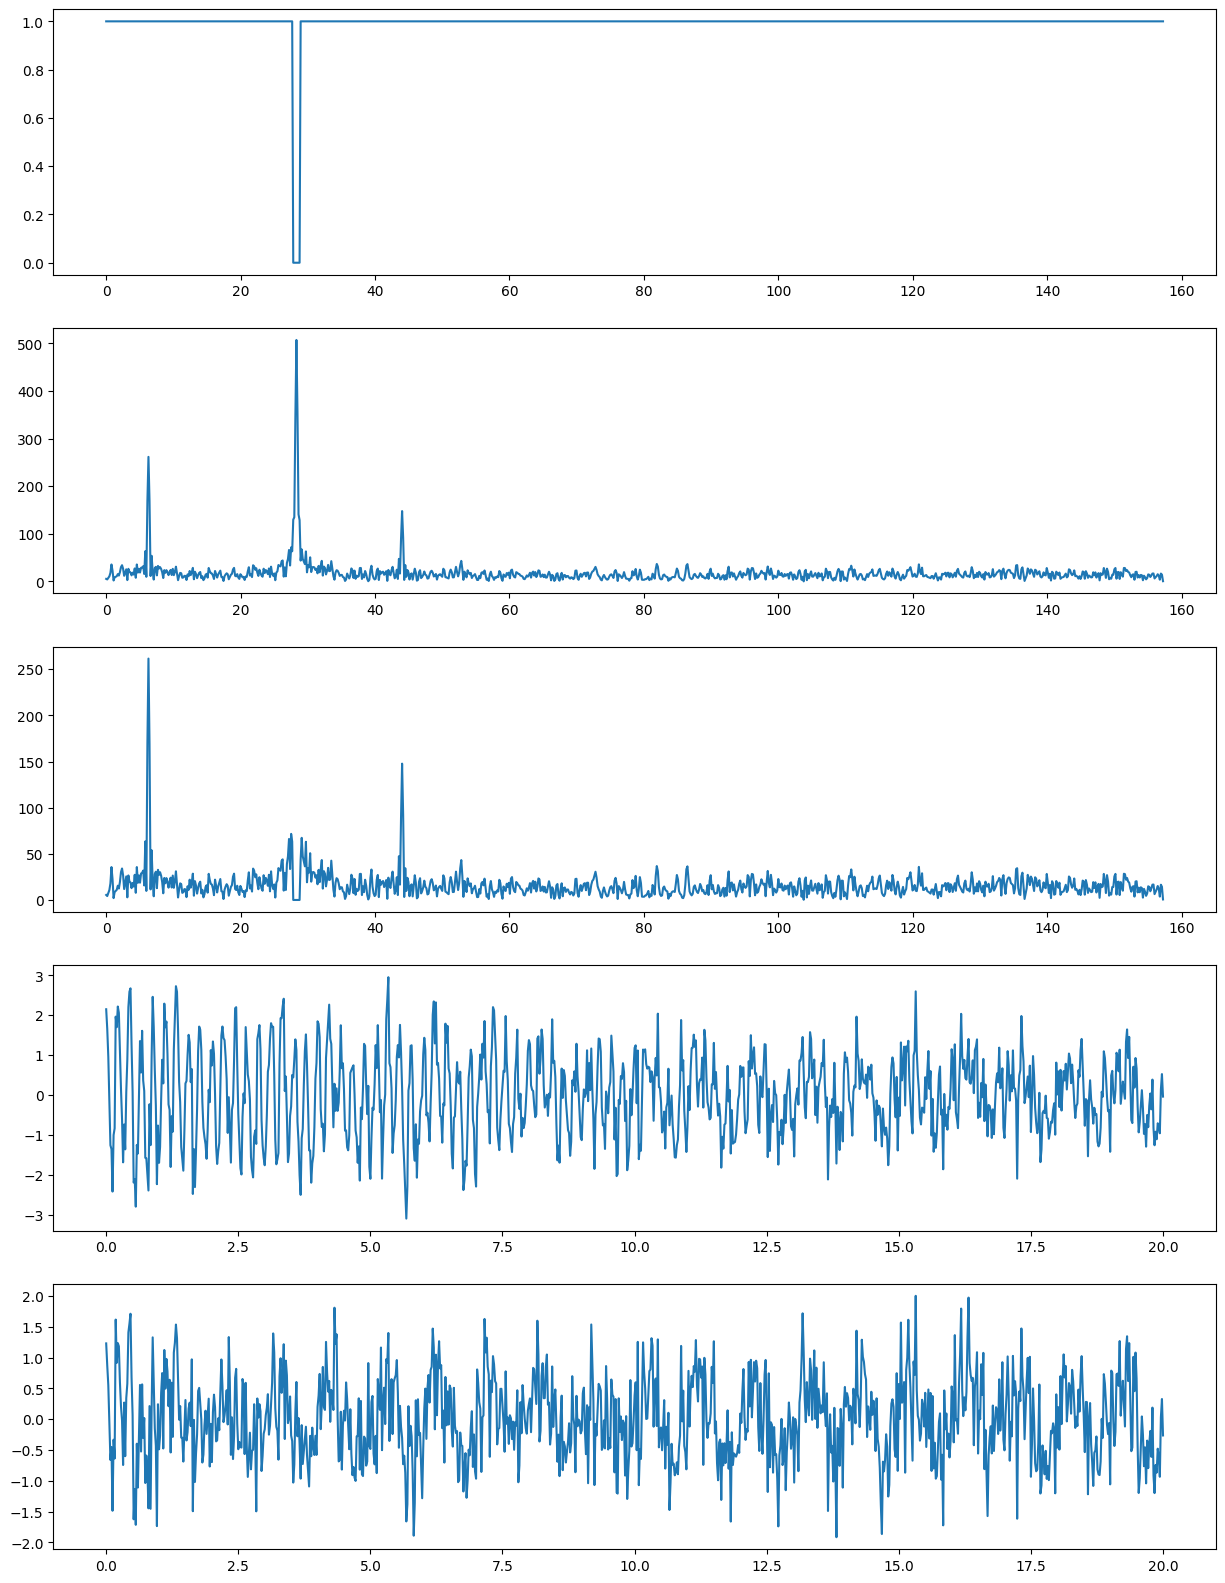

In [195]:
# new graph
fig, ax = plt.subplots(5,1,figsize=(15,20))


# define filter
k_to_filter = 28.3 # let's try to filter out the peak at 28.3
tolerance = 0.5

filter = (k_range < (k_to_filter - tolerance)) + (k_range > (k_to_filter + tolerance))

spectrum_filtered = filter * data_ft
x_range_new, signal_new = fourier_transform(k_range, spectrum_filtered, inverse=1)

# plot:
ax[0].plot(k_range, filter) # the filter function
ax[1].plot(k_range, np.abs(data_ft)) # the unfiltered spectrum
ax[2].plot(k_range, np.abs(spectrum_filtered)) # the filtered spectrum
ax[3].plot(x_range, np.real(data)) # the unfiltered signal
ax[4].plot(x_range_new, np.real(signal_new)) # the signal reconstructed from the filtered spectrum

# note: the filtered signal looks noisier because the y range in the figure is different

plt.show()

## Aufgabe 2

/tmp/ipykernel_82297/3189575376.py:32: RuntimeWarning: divide by zero encountered in log
  ax[1].imshow(np.log(np.abs(fft[center[0]-size:center[0]+size, center[1]-size:center[1]+size])), cmap='gray')


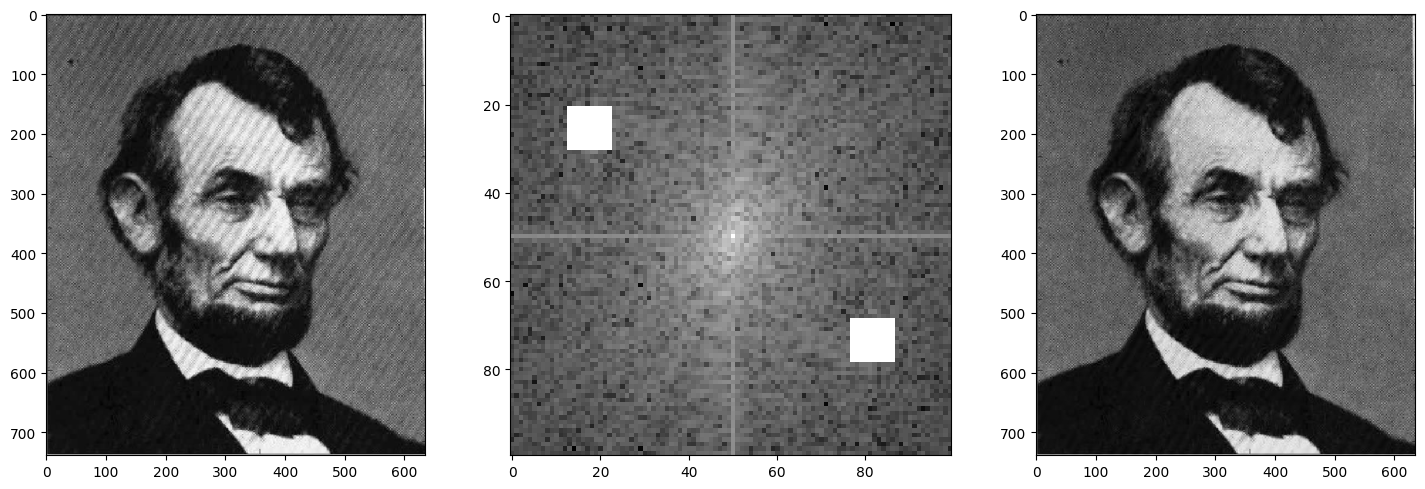

In [246]:
img = plt.imread('lincoln.jpg')
img = np.mean(img, axis=2)

# plot img, fft, and img after fft
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img, cmap='gray')

fft = np.fft.fft2(img)
fft = np.fft.fftshift(fft)

# create a cross mask
center = np.array(fft.shape) // 2
size = 50
mask = np.ones(fft.shape)
#mask[center[0]-size:center[0]+size, center[1]-size:center[1]+size] = 1

# mask out the point
point = (24, 32)
pointSize = 5
# point + center
mask[center[0]+point[0]-pointSize:center[0]+point[0]+pointSize, center[1]+point[1]-pointSize:center[1]+point[1]+pointSize] = 0
# point - center
mask[center[0]-point[0]-pointSize:center[0]-point[0]+pointSize, center[1]-point[1]-pointSize:center[1]-point[1]+pointSize] = 0



fft = fft * mask
ax[1].imshow(np.log(np.abs(fft[center[0]-size:center[0]+size, center[1]-size:center[1]+size])), cmap='gray')

fft = np.fft.fftshift(fft)
img = np.fft.ifft2(fft)
ax[2].imshow(np.abs(img), cmap='gray')

plt.tight_layout()
plt.show()

# export image
plt.imsave('lincoln_filtered.jpg', np.abs(img), cmap='gray')

## Aufgabe 3

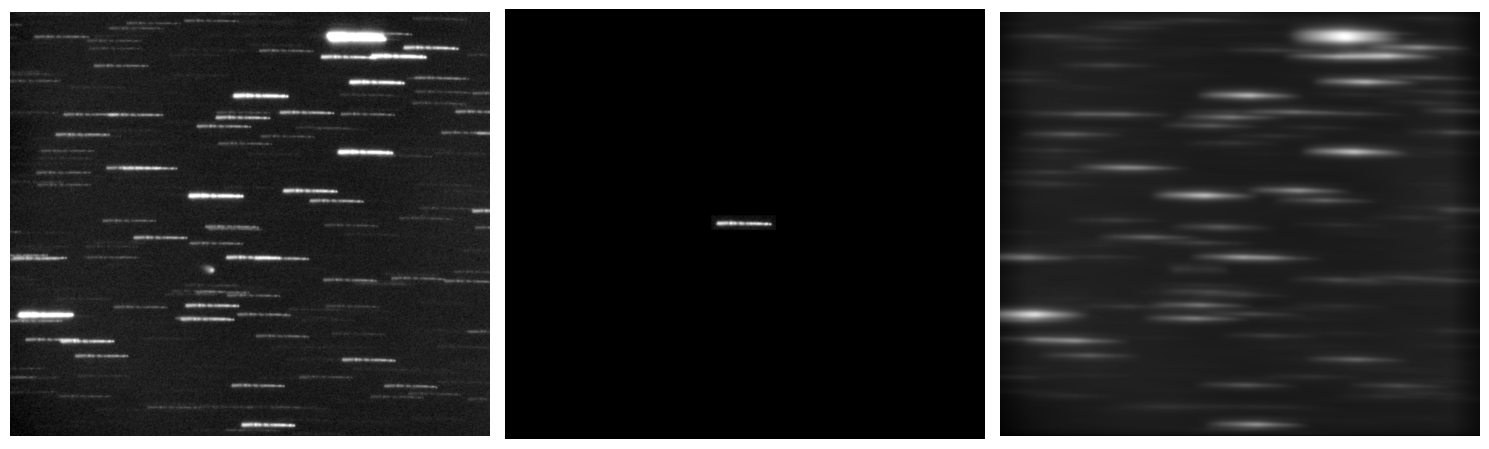

In [237]:
img = plt.imread('Sternspuren.jpg')
img = np.mean(img, axis=2)
kernel = plt.imread('Sternspur01.png')
kernel = np.mean(kernel, axis=2)

# make plot with image, kernel and convolution
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img, cmap='gray')

# map kernel between 0 and 1
kernel = (kernel - kernel.min()) / (kernel.max() - kernel.min())
# increase kernel contrast
#kernel = kernel**3
# binarize kernel
#kernel = kernel > kernel.mean()
# expand kernel with zeros on all sides
kernel = np.pad(
	kernel,
	(
		(img.shape[0] - kernel.shape[0]) // 2,
		(img.shape[1] - kernel.shape[1]) // 2
	)
)
ax[1].imshow(kernel, cmap='gray')

# convolve the kernel on the image
conv = sp.signal.fftconvolve(
	img, kernel,
	mode='same'
)
ax[2].imshow(conv, cmap='gray')

# remove axis
for a in ax:
	a.axis('off')
plt.tight_layout()
plt.show()